### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

## Москва 2024
***

##### Студент:  Артамонов Т.Е.
##### Группа:   НКНбд-01-21

КР 6, Вариант 18 

1. Набор данных dtd с изменением разрешения до 80x96 

2. Классы с метками 1,13,25,36 

3. Требования к архитектуре сети MLP: 

Последовательный API с методом add() при создании 

Функция потерь: разреженная категориальная кросс-энтропия 

Кол-во скрытых слоев 4 

Кол-во нейронов 70 в каждом нечетном скрытом слое, 90 в каждом четном скрытом слое 

Использование слоев dropout 

4. Требования к архитектуре сети CNN: 

Функциональный API при создании 

Функция потерь: категориальная кросс-энтропия 

Кол-во сверточных слоев 5 

Количество фильтров в сверточных слоях 8 

Размеры фильтра 2х2 

Использование слоев с регуляризацией L1L2 

5. Требования к архитектуре сети RNN: 

Последовательный API со списком слоев при создании 

Функция потерь: разреженная категориальная кросс-энтропия 

Слой LSTM с 96 нейронами 

Использование слоев пакетной нормализации 

6. Показатель качества многоклассовой классификации: 

минимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу. 

### Задание 1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.

### Решение
Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageOps

Скачивает датасет с разбиением на обучающую, тестовую и валидационную выборки

In [2]:
ds = tfds.load("dtd", split=['train', 'test', 'validation'])
df_train = tfds.as_dataframe(ds[0])
df_test = tfds.as_dataframe(ds[1])
df_val = tfds.as_dataframe(ds[2])
df_train.head(3)

,file_name,image,label
0,b'freckled/freckled_0117.jpg',"[[[215, 242, 249], [215, 242, 249], [216, 243,...",13
1,b'braided/braided_0108.jpg',"[[[32, 34, 23], [34, 36, 25], [38, 40, 29], [4...",2
2,b'flecked/flecked_0054.jpg',"[[[146, 143, 152], [143, 140, 149], [140, 137,...",12


### Задание 2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.

### Решение
Отбираем изображения с метками, указанные в варианте

In [3]:
x = df_train[df_train['label'] == 1]
y = df_train[df_train['label'] == 13]
v = df_train[df_train['label'] == 25]
z = df_train[df_train['label'] == 36]
x['label'] = 0
y['label'] = 1
z['label'] = 2
v['label'] = 3

df_tr1 = pd.concat([x, y, v, z])
Y_tr1 = df_tr1['label']
df_tr1 = df_tr1['image']

x = df_test[df_test['label'] == 1]
y = df_test[df_test['label'] == 13]
v = df_test[df_test['label'] == 25]
z = df_test[df_test['label'] == 36]
x['label'] = 0
y['label'] = 1
z['label'] = 2
v['label'] = 3

df_te1 = pd.concat([x, y, v, z])
Y_te1 = df_te1['label']
df_te1 = df_te1['image']

x = df_val[df_val['label'] == 1]
y = df_val[df_val['label'] == 13]
v = df_val[df_val['label'] == 25]
z = df_val[df_val['label'] == 36]
x['label'] = 0
y['label'] = 1
z['label'] = 2
v['label'] = 3
df_val1 = pd.concat([x, y, v, z])
Y_val1 = df_val1['label']
df_val1 = df_val1['image']

        
Y_tr1.value_counts()

C:\Users\artam\AppData\Local\Temp\ipykernel_13764\417073297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['label'] = 0
C:\Users\artam\AppData\Local\Temp\ipykernel_13764\417073297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label'] = 1
C:\Users\artam\AppData\Local\Temp\ipykernel_13764\417073297.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

label
0    40
1    40
3    40
2    40
Name: count, dtype: int64

Заодно сделаем one-hot encoding для одной из моделей

In [4]:
Y_tr2 = list(Y_tr1)
Y_te2 = list(Y_te1)
Y_val2 = list(Y_val1)
for i in range(len(Y_tr2)):
    tmp = [0]*4
    tmp[Y_tr2[i]] = 1
    Y_tr2[i] = tmp
for i in range(len(Y_te2)):
    tmp = [0]*4
    tmp[Y_te2[i]] = 1
    Y_te2[i] = tmp
for i in range(len(Y_val2)):
    tmp = [0]*4
    tmp[Y_val2[i]] = 1
    Y_val2[i] = tmp

In [5]:
Y_tr1 = np.array(Y_tr1)
Y_tr2 = np.array(Y_tr2)
Y_te1 = np.array(Y_te1)
Y_te2 = np.array(Y_te2)
Y_val1 = np.array(Y_val1)
Y_val2 = np.array(Y_val2)

In [6]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)

    num_row = 2
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

In [7]:
df_tr = np.zeros(shape=(df_tr1.shape[0],80,96,3), dtype=np.float32)
df_te  = np.zeros(shape=(df_te1.shape[0],80,96,3), dtype=np.float32)
df_va  = np.zeros(shape=(df_val1.shape[0],80,96,3), dtype=np.float32)
    
for i in range(len(df_tr1)): 
    df_tr[i,:,:,:] = np.array(Image.fromarray(df_tr1.iloc[i]).resize((96,80)))
for i in range(len(df_te1)): 
    df_te[i,:,:,:] = np.array(Image.fromarray(df_te1.iloc[i]).resize((96,80)))
for i in range(len(df_val1)): 
    df_va[i,:,:,:] = np.array(Image.fromarray(df_val1.iloc[i]).resize((96,80)))

df_tr /= 255
df_te  /= 255
df_va /= 255

In [8]:
df_tr.shape, Y_tr1.shape

((160, 80, 96, 3), (160,))

Сжали изображение до разрешения, указанного в варианте. Покажем несколько случайных изображений из тренировочной выборки

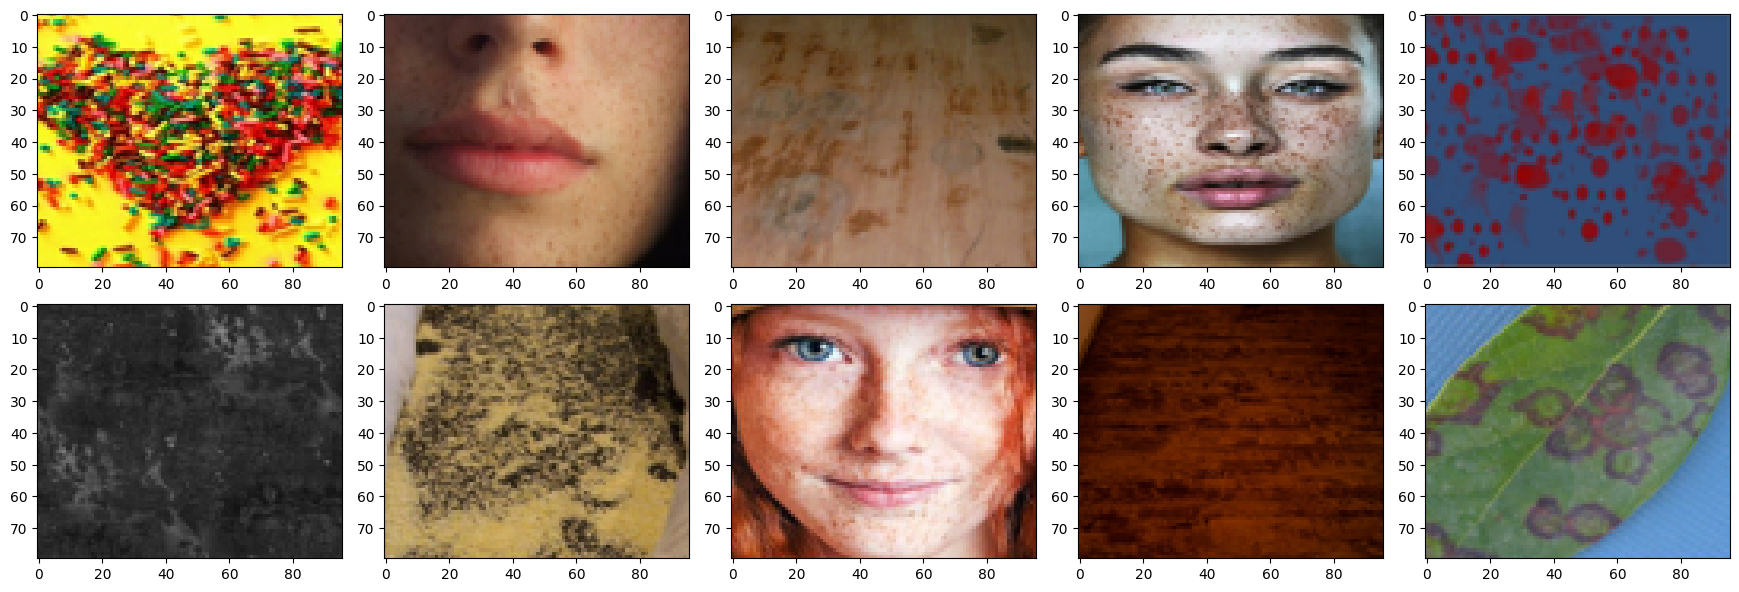

In [9]:
plot_random_sample(df_tr)

### Задание 3. Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини- пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения.

### Решение
Создадим и обучим MLP модель, установим остановку обучения после 3 эпох с повышением потерь на валидационных данных, попробовал разные функции активации, оптимизаторы и начальные коэффициент обучения, этот вариант оказался самым эффективным.

In [10]:
mlp = tf.keras.Sequential()
mlp.add(tf.keras.layers.Flatten())
mlp.add(tf.keras.layers.Dropout(0.2))
mlp.add(tf.keras.layers.Dense(70, activation="selu"))
mlp.add(tf.keras.layers.Dropout(0.2))
mlp.add(tf.keras.layers.Dense(90, activation="selu"))
mlp.add(tf.keras.layers.Dropout(0.2))
mlp.add(tf.keras.layers.Dense(70, activation="selu"))
mlp.add(tf.keras.layers.Dropout(0.2))
mlp.add(tf.keras.layers.Dense(90, activation="selu"))
mlp.add(tf.keras.layers.Dense(4, activation="softmax"))

mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

history1 = mlp.fit(df_tr,
                  Y_tr1,
                  epochs=50,
                  validation_data=(df_va, Y_val1),
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
                  batch_size=16
                  )  

Epoch 1/50
10/10 [==============================] - 2s 39ms/step - loss: 7.4282 - accuracy: 0.2062 - val_loss: 5.6211 - val_accuracy: 0.2562
Epoch 2/50
10/10 [==============================] - 0s 19ms/step - loss: 4.8690 - accuracy: 0.2313 - val_loss: 3.1400 - val_accuracy: 0.2688
Epoch 3/50
10/10 [==============================] - 0s 19ms/step - loss: 4.0224 - accuracy: 0.2500 - val_loss: 1.8784 - val_accuracy: 0.2625
Epoch 4/50
10/10 [==============================] - 0s 19ms/step - loss: 2.8958 - accuracy: 0.3000 - val_loss: 2.3915 - val_accuracy: 0.2500
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 2.4895 - accuracy: 0.2000 - val_loss: 1.6088 - val_accuracy: 0.2500
Epoch 6/50
10/10 [==============================] - 0s 18ms/step - loss: 1.9532 - accuracy: 0.2875 - val_loss: 1.4787 - val_accuracy: 0.3438
Epoch 7/50
10/10 [==============================] - 0s 19ms/step - loss: 1.7869 - accuracy: 0.3125 - val_loss: 1.3765 - val_accuracy: 0.3875
Epoch 8/50
10

Создадим и обучим RNN модель, , установим остановку обучения после 3 эпох с повышением потерь на валидационных данных, попробовал разные функции активации, оптимизаторы и начальные коэффициент обучения, этот вариант оказался самым эффективным.

In [11]:
df_tr2 = df_tr.reshape(df_tr.shape[0], df_tr.shape[-1], -1)
df_te2 = df_te.reshape(df_te.shape[0], df_te.shape[-1], -1)
df_va2 = df_va.reshape(df_va.shape[0], df_va.shape[-1], -1)
rnn = tf.keras.Sequential([
    tf.keras.layers.LSTM(96),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation="softmax")
])

rnn.compile(optimizer=tf.keras.optimizers.Adam(0.00001), 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])
history2 = rnn.fit(df_tr2,
                  Y_tr1,
                  epochs=50,
                  validation_data=(df_va2, Y_val1),
                  batch_size=16,
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]) 


Epoch 1/50
10/10 [==============================] - 3s 101ms/step - loss: 1.6506 - accuracy: 0.2438 - val_loss: 1.3851 - val_accuracy: 0.3063
Epoch 2/50
10/10 [==============================] - 0s 39ms/step - loss: 1.3907 - accuracy: 0.3750 - val_loss: 1.3801 - val_accuracy: 0.3063
Epoch 3/50
10/10 [==============================] - 0s 37ms/step - loss: 1.2791 - accuracy: 0.4250 - val_loss: 1.3764 - val_accuracy: 0.3187
Epoch 4/50
10/10 [==============================] - 0s 39ms/step - loss: 1.1590 - accuracy: 0.4500 - val_loss: 1.3743 - val_accuracy: 0.3500
Epoch 5/50
10/10 [==============================] - 0s 39ms/step - loss: 1.0956 - accuracy: 0.5188 - val_loss: 1.3678 - val_accuracy: 0.3625
Epoch 6/50
10/10 [==============================] - 0s 38ms/step - loss: 1.0039 - accuracy: 0.5562 - val_loss: 1.3640 - val_accuracy: 0.4062
Epoch 7/50
10/10 [==============================] - 0s 40ms/step - loss: 0.9503 - accuracy: 0.6125 - val_loss: 1.3564 - val_accuracy: 0.4125
Epoch 8/50
1

Создадим и обучим CNN модель, она в моём случае всегда показывает более хорошие показатели, по сравнению с другими моделями

In [12]:
inputs = tf.keras.Input(shape=(80, 96, 3))
x = tf.keras.layers.Conv2D(filters=8, kernel_size=(2, 2),activation='selu',kernel_regularizer='l1_l2')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(filters=8, kernel_size=(2, 2),activation='selu',kernel_regularizer='l1_l2')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(filters=8, kernel_size=(2, 2),activation='selu',kernel_regularizer='l1_l2')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(filters=8, kernel_size=(2, 2),activation='selu',kernel_regularizer='l1_l2')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(filters=8, kernel_size=(2, 2),activation='selu',kernel_regularizer='l1_l2')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

cnn = tf.keras.Model(inputs, outputs)
cnn.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
history3 = cnn.fit(df_tr,
                  Y_tr2,
                  epochs=50,
                  validation_data=(df_va, Y_val2),
                    batch_size=8,
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
                 ) 


Epoch 1/50
20/20 [==============================] - 2s 27ms/step - loss: 3.4639 - accuracy: 0.2688 - val_loss: 3.4194 - val_accuracy: 0.3125
Epoch 2/50
20/20 [==============================] - 0s 14ms/step - loss: 3.3478 - accuracy: 0.3688 - val_loss: 3.3154 - val_accuracy: 0.2937
Epoch 3/50
20/20 [==============================] - 0s 14ms/step - loss: 3.2603 - accuracy: 0.3812 - val_loss: 3.2294 - val_accuracy: 0.3187
Epoch 4/50
20/20 [==============================] - 0s 14ms/step - loss: 3.1734 - accuracy: 0.3938 - val_loss: 3.1616 - val_accuracy: 0.3625
Epoch 5/50
20/20 [==============================] - 0s 14ms/step - loss: 3.0856 - accuracy: 0.4062 - val_loss: 3.0943 - val_accuracy: 0.3313
Epoch 6/50
20/20 [==============================] - 0s 14ms/step - loss: 3.0107 - accuracy: 0.5000 - val_loss: 3.0498 - val_accuracy: 0.3313
Epoch 7/50
20/20 [==============================] - 0s 14ms/step - loss: 2.9480 - accuracy: 0.4437 - val_loss: 2.9356 - val_accuracy: 0.4313
Epoch 8/50
20

Выведем, сколько потребовалось эпох на обучение каждой модели

In [13]:
print("MLP epochs:", len(history1.history['loss']))
print("RNN epochs:", len(history2.history['loss']))
print("CNN epochs:", len(history3.history['loss']))

MLP epochs: 16
RNN epochs: 36
CNN epochs: 50


### Задание 4. Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством.

### Решение
Переведём вероятности в однозначный ответ

In [14]:
X1 = mlp.predict(df_te)
X2 = rnn.predict(df_te2)
X3 = cnn.predict(df_te)
for i in range(len(X1)):
    for j in range(len(X1[i])):
        if X1[i][j] == max(X1[i]):
            X1[i][j] = 1
        else:
            X1[i][j] = 0
for i in range(len(X2)):
    for j in range(len(X2[i])):
        if X2[i][j] == max(X2[i]):
            X2[i][j] = 1
        else:
            X2[i][j] = 0
for i in range(len(X3)):
    for j in range(len(X3[i])):
        if X3[i][j] == max(X3[i]):
            X3[i][j] = 1
        else:
            X3[i][j] = 0
X11 = np.array(X1, dtype=np.int32)
X22 = np.array(X2, dtype=np.int32)
X33 = np.array(X3, dtype=np.int32)
m1 = tf.keras.metrics.Recall()
m2 = tf.keras.metrics.Recall()
m3 = tf.keras.metrics.Recall()
m1.update_state(X11, Y_te2)
m2.update_state(X22, Y_te2)
m3.update_state(X33, Y_te2)

5/5 [==============================] - 0s 10ms/step


Сравним Recall моделей

In [15]:
m1.result().numpy(), m2.result().numpy(), m3.result().numpy()

(0.31875, 0.375, 0.50625)

, выведем её архитектуру

In [16]:
cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 79, 95, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 48, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 47, 8)         264       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 24, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 23, 8)         264   

### Задание 5. Визуализируйте кривые обучения трех построенных моделей для показателя потерь на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

### Решение

In [17]:
a1 = history1.history['val_loss']
a1 = [x/history1.history['val_loss'][0] for x in a1]
a2 = history2.history['val_loss']
a2 = [x/history2.history['val_loss'][0] for x in a2]
a3 = history3.history['val_loss']
a3 = [x/history3.history['val_loss'][0] for x in a3]


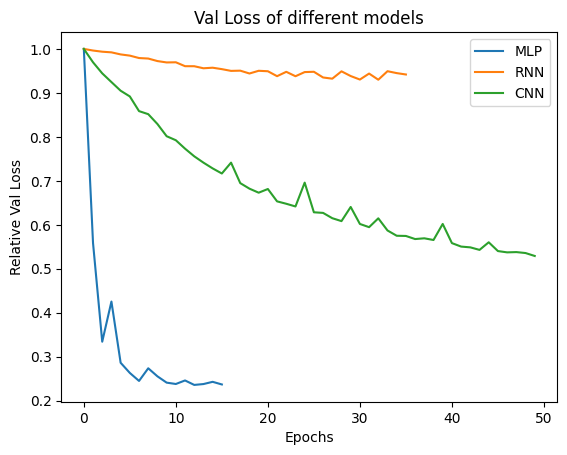

In [18]:
plt.plot([i for i in range(len(history1.history['val_loss']))], a1, label='MLP')
plt.plot([i for i in range(len(history2.history['val_loss']))], a2, label='RNN')
plt.plot([i for i in range(len(history3.history['val_loss']))], a3, label='CNN')
plt.xlabel('Epochs')
plt.ylabel('Relative Val Loss')
plt.title('Val Loss of different models')
plt.legend();

### Задание 6. Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

### Решение

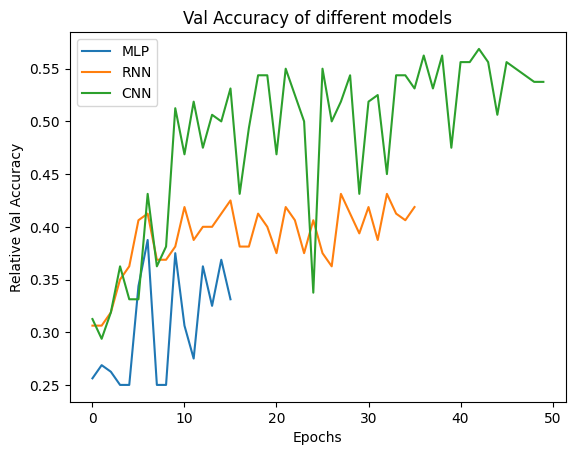

In [19]:
plt.plot([i for i in range(len(history1.history['val_accuracy']))], history1.history['val_accuracy'], label='MLP')
plt.plot([i for i in range(len(history2.history['val_accuracy']))], history2.history['val_accuracy'], label='RNN')
plt.plot([i for i in range(len(history3.history['val_accuracy']))], history3.history['val_accuracy'], label='CNN')
plt.xlabel('Epochs')
plt.ylabel('Relative Val Accuracy')
plt.title('Val Accuracy of different models')
plt.legend();

### Задание 7. Используя модель нейронной сети с лучшей долей верных ответов на тестовой выборке, определите для каждого из классов два изображения в тестовой выборке, имеющие минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.

### Решение
Создадим 2 списка с индексами изображений с самыми низкими и высокими вероятностями для правильного класса

In [20]:
A = [0]*4
B = [0]*4

for i in range(len(X3)):
    for j in range(len(X3[i])):
        if X3[i][j] > X3[A[j]][j] and Y_te2[i][j] == 1:
            A[j] = i

        if X3[i][j] < X3[B[j]][j] and Y_te2[i][j] == 1:
            B[j] = i

A, B

([0, 41, 123, 80], [1, 0, 0, 0])

Максимальная вероятность для 1 класса

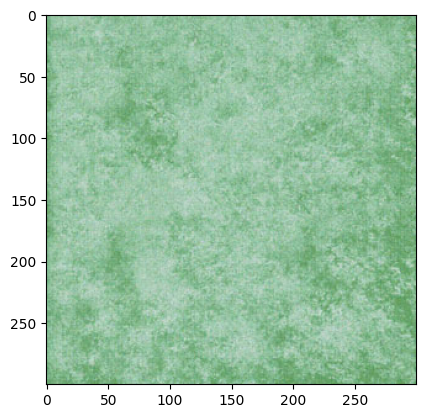

In [21]:
plt.imshow(Image.fromarray(df_te1.iloc[0]))

Минимальная вероятность для 1 класса

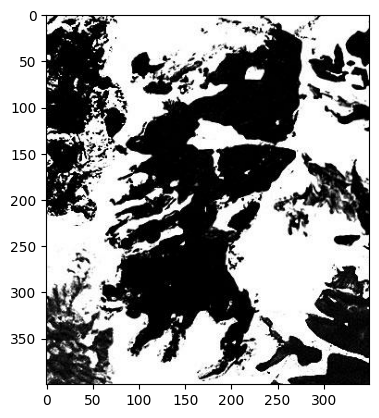

In [22]:
plt.imshow(Image.fromarray(df_te1.iloc[B[0]]))

Максимальная вероятность для 2 класса

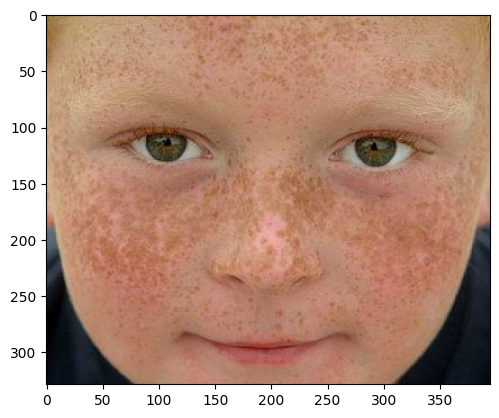

In [23]:
plt.imshow(Image.fromarray(df_te1.iloc[A[1]]))

Минимальная вероятность для 2 класса

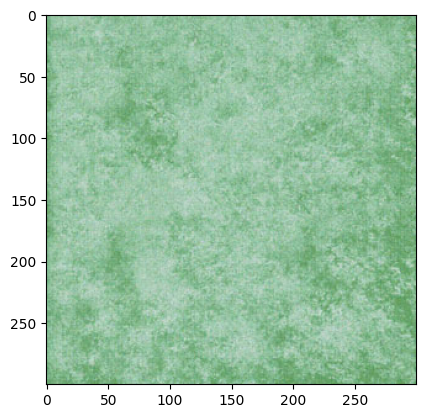

In [24]:
plt.imshow(Image.fromarray(df_te1.iloc[B[1]]))

Максимальная вероятность для 3 класса


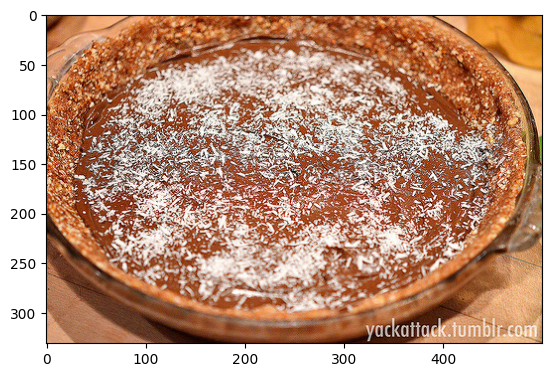

In [25]:
plt.imshow(Image.fromarray(df_te1.iloc[A[2]]))

Минимальная вероятность для 3 класса

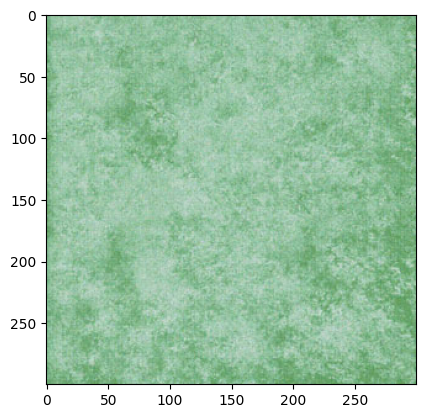

In [26]:
plt.imshow(Image.fromarray(df_te1.iloc[B[2]]))

Максимальная вероятность для 4 класса


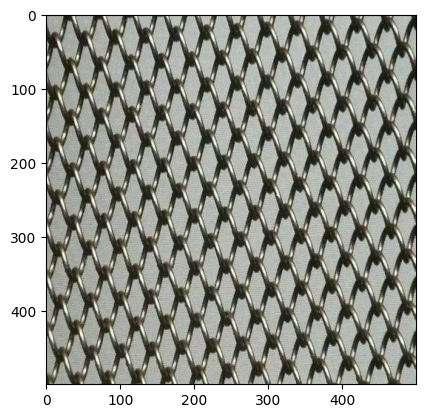

In [27]:
plt.imshow(Image.fromarray(df_te1.iloc[A[3]]))

Минимальная вероятность для 4 класса


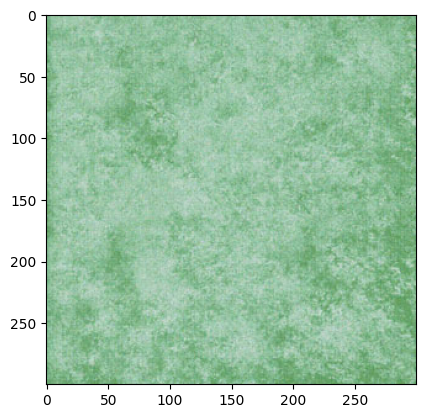

In [28]:
plt.imshow(Image.fromarray(df_te1.iloc[B[3]]))